<a href="https://colab.research.google.com/github/KWeatherwalks/DSPortfolio/blob/main/Christina_high_schools_discipline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Discipline Equity

Research Question: Did public high schools in the Christina School District discipline 9th graders of different race demographics equally in the 2018-2019 school year?


Tests: Multiple Chi-square tests for independence performed on each of the 3 public high schools 

Import libraries

In [1]:
from statsmodels.graphics.mosaicplot import mosaic # Mosaic plots
from scipy.stats import chi2_contingency # chi-square test for independence
from scipy.stats import chi2 # to plot chi-square distribution

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Socrata Open Data

https://data.delaware.gov/Education/Student-Discipline/yr4w-jdi4

https://support.socrata.com/hc/en-us/articles/202949268-How-to-query-more-than-1000-rows-of-a-dataset

https://www.aclu-de.org/en/analyzing-discipline-data-disrupting-disciplinary-cycle

https://www.ewa.org/blog-latino-ed-beat/research-examines-how-latino-students-are-disciplined

https://data.delaware.gov/Education/Student-Enrollment-by-Year-Organization-and-Race/utax-x8tw

https://nces.ed.gov/pubs2011/2011603.pdf

https://www2.ed.gov/admins/lead/account/stateplan17/decsa2017.pdf

https://studentprivacy.ed.gov/sites/default/files/resource_document/file/FAQs_disclosure_avoidance_0.pdf

https://towardsdatascience.com/mosaic-plot-and-chi-square-test-c41b1a527ce4




Racial Equity Resources  
https://www.seattle.gov/Documents/Departments/RSJI/Defining-racism.pdf


In [2]:
df = pd.read_json('https://data.delaware.gov/resource/yr4w-jdi4.json?$limit=654000')
df.sample(5)

,schoolyear,districtcode,district,schoolcode,organization,race,gender,grade,specialdemo,geography,subgroup,category,rowstatus,students,enrollment,pctenrollment,incidents,avgduration
137623,2016,24,Smyrna School District,0,Smyrna School District,White,Female,7th Grade,Homeless,All Students,White/Female/7th Grade/Homeless,Out-of-School Suspension,REDACTED,NaN,NaN,NaN,NaN,NaN
626296,2020,34,Colonial School District,490,Penn (William) High School,Hispanic/Latino,Male,10th Grade,Non-Homeless,All Students,Hispanic/Latino/Male/10th Grade/Non-Homeless,In-School Suspension,REPORTED,14.0,82.0,17.07,33.0,1.18
265801,2017,32,Red Clay Consolidated School District,0,Red Clay Consolidated School District,Hispanic/Latino,Male,10th Grade,Active EL Students,All Students,Hispanic/Latino/Male/10th Grade/Active EL Stud...,Out-of-School Suspension,REPORTED,6.0,47.0,12.77,10.0,2.20
393102,2018,33,Christina School District,322,Leasure (May B.) Elementary School,African American,Male,1st Grade,Non-Foster Care,All Students,African American/Male/1st Grade/Non-Foster Care,In-School Suspension,REDACTED,NaN,23.0,NaN,NaN,NaN
369858,2018,29,Appoquinimink School District,18,Middletown High School,African American,All Students,12th Grade,All Students,All Students,African American/12th Grade,Out-of-School Suspension,REDACTED,NaN,123.0,NaN,NaN,NaN


In [3]:
df.sort_values(by='pctenrollment',ascending=False).head()

,schoolyear,districtcode,district,schoolcode,organization,race,gender,grade,specialdemo,geography,subgroup,category,rowstatus,students,enrollment,pctenrollment,incidents,avgduration
18035,2015,16,Laurel School District,0,Laurel School District,All Students,All Students,All Students,Low-Income,All Students,Low Income,In-School Suspension,REPORTED,161.0,190.0,84.74,409.0,0.83
397424,2018,33,Christina School District,362,Stubbs (Frederick Douglass) Elementary School,African American,Male,3rd Grade,Low-Income,All Students,African American/Male/3rd Grade/Low-Income,In-School Suspension,REPORTED,20.0,25.0,80.00,28.0,0.65
241705,2017,18,Milford School District,0,Milford School District,African American,Male,9th Grade,Low-Income,All Students,African American/Male/9th Grade/Low-Income,In-School Suspension,REPORTED,19.0,24.0,79.17,111.0,1.20
244476,2017,18,Milford School District,678,Milford Senior High School,African American,Male,9th Grade,Low-Income,All Students,African American/Male/9th Grade/Low-Income,In-School Suspension,REPORTED,19.0,24.0,79.17,111.0,1.20
397432,2018,33,Christina School District,362,Stubbs (Frederick Douglass) Elementary School,African American,Male,3rd Grade,Non-Homeless,All Students,African American/Male/3rd Grade/Non-Homeless,In-School Suspension,REPORTED,19.0,24.0,79.17,24.0,0.69


In [4]:
df['specialdemo'].value_counts()

All Students                  143293
Low-Income                     85860
Non-EL Students                78091
Non-SWD                        69842
Students with Disabilities     67263
Non Low-Income                 56193
Non-Foster Care                51580
Non-Homeless                   50753
Active EL Students             21697
Homeless                       17323
Foster Care                     6667
Military Connected Youth        4855
Name: specialdemo, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653417 entries, 0 to 653416
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   schoolyear     653417 non-null  int64  
 1   districtcode   653417 non-null  int64  
 2   district       653417 non-null  object 
 3   schoolcode     653417 non-null  int64  
 4   organization   653417 non-null  object 
 5   race           653417 non-null  object 
 6   gender         653417 non-null  object 
 7   grade          653417 non-null  object 
 8   specialdemo    653417 non-null  object 
 9   geography      653417 non-null  object 
 10  subgroup       653417 non-null  object 
 11  category       653417 non-null  object 
 12  rowstatus      653417 non-null  object 
 13  students       188020 non-null  float64
 14  enrollment     431238 non-null  float64
 15  pctenrollment  188020 non-null  float64
 16  incidents      188020 non-null  float64
 17  avgduration    188020 non-nul

# Data Wrangling

## Districts

In [6]:
districts = df[['districtcode','district']].drop_duplicates() \
                                            .sort_values(by='districtcode') \
                                            .reset_index()
districts

,index,districtcode,district
0,0,0,State of Delaware
1,4100,10,Caesar Rodney School District
2,8760,13,Capital School District
3,13198,15,Lake Forest School District
4,16656,16,Laurel School District
5,19781,17,Cape Henlopen School District
6,23373,18,Milford School District
7,27593,23,Seaford School District
8,31961,24,Smyrna School District
9,36032,29,Appoquinimink School District


## Christina School District

In [7]:
# remove redundant columns
def keep_columns(data):  
  columns = ['schoolyear', 'districtcode', 'district', 'schoolcode', 
            'organization', 'race', 'gender', 'grade', 'specialdemo',
             'category', 'students', 'enrollment', 'incidents']
  return data[columns].copy()

In [8]:
# filter for Christina schools
mask = (df['rowstatus']=='REPORTED') & (df['districtcode']==33) & \
        (df['schoolcode']!=0) & (df['schoolyear']==2019)

christina = (keep_columns(df))[mask]

In [9]:
# map grade to integer
def grade_to_int(x):
  try:
    return int(x.split()[0][:-2])
  except:
    return x
# add column to aid in sorting of later crosstab
christina['grade_number'] = christina['grade'].apply(grade_to_int)

### Christina Schools

In [10]:
christina_schools = christina[['schoolcode','organization']].drop_duplicates() \
                                                            .reset_index()

In [11]:
christina_schools

,index,schoolcode,organization
0,505070,310,Brookside Elementary School
1,505255,312,Marshall (Thurgood) Elementary School
2,505631,314,Jones (Albert H.) Elementary School
3,505923,318,Downes (John R.) Elementary School
4,506241,320,Gallaher (Robert S.) Elementary School
5,506403,321,Keene (William B.) Elementary School
6,507014,322,Leasure (May B.) Elementary School
7,507350,324,Maclary (R. Elisabeth) Elementary School
8,507536,326,McVey (Joseph M.) Elementary School
9,507755,327,Oberle (William) Elementary School


### Which Schools Are High Schools?

In [12]:
# Number of entries per school by grade
pd.crosstab(index=christina['organization'],columns=christina['grade_number'])

grade_number,1,2,3,4,5,6,7,8,9,10,11,12,All Students,Kindergarten
organization,,,,,,,,,,,,,,
Bancroft Elementary School,25,21,16,20,19,0,0,0,0,0,0,0,17,0
Bayard Middle School,0,0,0,0,0,61,54,51,0,0,0,0,30,0
Brader (Henry M.) Elementary School,19,13,21,3,10,0,0,0,0,0,0,0,23,0
Brookside Elementary School,0,0,0,2,2,0,0,0,0,0,0,0,8,0
Christiana High School,0,0,0,0,0,2,0,0,74,70,64,47,30,0
Delaware School for the Deaf School (DSD),0,0,0,0,0,0,0,0,0,0,0,0,8,0
Douglass School,0,0,0,0,0,0,0,0,22,6,0,0,13,0
Downes (John R.) Elementary School,0,0,0,3,1,0,0,0,0,0,0,0,15,0
Elbert-Palmer Elementary School,3,6,2,26,27,0,0,0,0,0,0,0,22,3


## Set up filters for the three high school dataframes

In [13]:
def filter_by_school(df, schoolcode):
  '''
  Takes student discipline dataframe with an integer schoolcode 
    and returns a dataframe for that school
    '''
  data = df.copy()
  
  # create boolean mask to filter rows
  mask = (data['schoolcode']==schoolcode) & (data['districtcode']!=0) & \
          (data['schoolyear']==2019) & (data['grade']=='9th Grade') & \
          (data['specialdemo']=='All Students') & \
          (data['gender']=='All Students') & \
          (data['category'].isin(['All Students','Out-of-School Suspension']))
  # apply filter condition
  data = data[mask]
  
  # drop unwanted columns
  cols_to_drop = ['rowstatus','subgroup', 'specialdemo', 'pctenrollment',
                  'districtcode','schoolyear','grade','geography','gender'
                  ]
  data = data.drop(columns=cols_to_drop)

  return data

In [14]:
# Get dataframe for one school
newark = filter_by_school(df, 394).reset_index()
newark

,index,district,schoolcode,organization,race,category,students,enrollment,incidents,avgduration
0,514543,Christina School District,394,Newark High School,Hispanic/Latino,Out-of-School Suspension,20.0,80.0,36.0,1.67
1,514703,Christina School District,394,Newark High School,African American,Out-of-School Suspension,86.0,217.0,201.0,3.06
2,514906,Christina School District,394,Newark High School,White,Out-of-School Suspension,NaN,112.0,NaN,NaN
3,515112,Christina School District,394,Newark High School,Multi-Racial,Out-of-School Suspension,NaN,NaN,NaN,NaN
4,515180,Christina School District,394,Newark High School,All Students,Out-of-School Suspension,117.0,440.0,238.0,3.05


## Function for processing each school

In [15]:
def contingency_from_school(schooldf):
  '''
    Takes a single school's dataframe and returns a contingency table for 
      out-of-school suspension vs. no out-of-school suspension counts by race
  '''
  #NOTE: THIS FUNCTION ONLY WORKS IF ROW FOR ALL STUDENTS CONTAINS NON-NULL DATA
  
  # Keep needed columns
  cols = ['race','students','enrollment']
  schooldf = schooldf[cols].copy()
  
  # remove redacted race information
  condition = (schooldf['students'].notnull())&(schooldf['enrollment'].notnull())
  schooldf = schooldf[condition]

  ### Add new row with Other (White,Mult-racial, etc.) category for race ###
  # set values to subtract from
  condition = schooldf['race']=='All Students'
  other_OOS = int(schooldf.loc[condition, 'students'])
  other_enrollment = int(schooldf.loc[condition, 'enrollment'])
  # loop through each row
  for race in schooldf[~condition]['race'].unique():
    other_OOS -= int(schooldf[schooldf['race']==race]['students'])
    other_enrollment -= int(schooldf[schooldf['race']==race]['enrollment'])
  # append df with new row
  schooldf = schooldf.append(
      {'race':'Other',
       'students': other_OOS, 
       'enrollment': other_enrollment},
       ignore_index=True)
  
  # Drop all students row
  schooldf = schooldf[schooldf['race']!='All Students']

  # Convert out-of-school and create no out-of-school columns
  schooldf = schooldf.copy().rename(columns={'students': 'OOS'})
  schooldf['no_OOS'] = schooldf['enrollment']-schooldf['OOS']
  # Drop enrolmment column
  schooldf = schooldf[['race','OOS','no_OOS']]

  # Set index to get contingency table

  return schooldf.set_index('race')

# Explore

In [60]:
christiana = filter_by_school(df,390)
glasgow = filter_by_school(df, 392)
newark = filter_by_school(df, 394)

douglass = filter_by_school(df, 537)

In [17]:
newark

,district,schoolcode,organization,race,category,students,enrollment,incidents,avgduration
514543,Christina School District,394,Newark High School,Hispanic/Latino,Out-of-School Suspension,20.0,80.0,36.0,1.67
514703,Christina School District,394,Newark High School,African American,Out-of-School Suspension,86.0,217.0,201.0,3.06
514906,Christina School District,394,Newark High School,White,Out-of-School Suspension,NaN,112.0,NaN,NaN
515112,Christina School District,394,Newark High School,Multi-Racial,Out-of-School Suspension,NaN,NaN,NaN,NaN
515180,Christina School District,394,Newark High School,All Students,Out-of-School Suspension,117.0,440.0,238.0,3.05


In [18]:
christiana

,district,schoolcode,organization,race,category,students,enrollment,incidents,avgduration
512959,Christina School District,390,Christiana High School,Hispanic/Latino,Out-of-School Suspension,8.0,42.0,22.0,2.27
513090,Christina School District,390,Christiana High School,African American,Out-of-School Suspension,62.0,135.0,235.0,2.65
513328,Christina School District,390,Christiana High School,White,Out-of-School Suspension,14.0,45.0,47.0,2.16
513509,Christina School District,390,Christiana High School,Asian American,Out-of-School Suspension,NaN,21.0,NaN,NaN
513590,Christina School District,390,Christiana High School,Multi-Racial,Out-of-School Suspension,NaN,NaN,NaN,NaN
513697,Christina School District,390,Christiana High School,All Students,Out-of-School Suspension,87.0,254.0,302.0,2.55


In [19]:
glasgow

,district,schoolcode,organization,race,category,students,enrollment,incidents,avgduration
513824,Christina School District,392,Glasgow High School,Hispanic/Latino,Out-of-School Suspension,21.0,96.0,42.0,3.74
513979,Christina School District,392,Glasgow High School,African American,Out-of-School Suspension,60.0,172.0,144.0,2.99
514176,Christina School District,392,Glasgow High School,White,Out-of-School Suspension,9.0,62.0,26.0,2.37
514300,Christina School District,392,Glasgow High School,Asian American,Out-of-School Suspension,NaN,NaN,NaN,NaN
514348,Christina School District,392,Glasgow High School,Multi-Racial,Out-of-School Suspension,NaN,NaN,NaN,NaN
514418,Christina School District,392,Glasgow High School,All Students,Out-of-School Suspension,94.0,352.0,205.0,3.05


In [20]:
douglass

,district,schoolcode,organization,race,category,students,enrollment,incidents,avgduration
515401,Christina School District,537,Douglass School,African American,Out-of-School Suspension,16.0,59.0,25.0,1.79
515550,Christina School District,537,Douglass School,White,Out-of-School Suspension,NaN,15.0,NaN,NaN
515612,Christina School District,537,Douglass School,All Students,Out-of-School Suspension,NaN,78.0,NaN,NaN


# Hypothesis Testing

In [167]:
# create lists of names and codes
highschool_codes = [390, 392, 394] # douglass code is 537 but contains null data for all students
highschool_names = [christina[christina['schoolcode']==code]['organization'].unique()[0] for code in highschool_codes]

## Results

In [229]:
alpha = 0.05
bonferroni_alpha = alpha / 3
results = []

for code,name in zip(highschool_codes,highschool_names):
  table = contingency_from_school(filter_by_school(df,code))
  result = chi2_contingency(table)
  results.append(result)
  print('--------------------------------------')
  print(name)
  print(table)
  print()
  print("chi^2 stat:\t", result[0])
  print('p-value: \t', result[1])
  print('degrees of freedom: ', result [2])
  print('N: ', table.sum().sum())
  print('expected:')
  for line in result[3]:
    print('\t\t ', line.round(1))
  print()
  if result[1] < bonferroni_alpha:
    print(f'Reject H_0 at the {round(bonferroni_alpha,3)} significance level')
  else:
    print('Fail to reject H_0')
  

--------------------------------------
Christiana High School
                   OOS  no_OOS
race                          
Hispanic/Latino    8.0    34.0
African American  62.0    73.0
White             14.0    31.0
Other              3.0    29.0

chi^2 stat:	 21.471925488559464
p-value: 	 8.399975101724077e-05
degrees of freedom:  3
N:  254.0
expected:
		  [14.4 27.6]
		  [46.2 88.8]
		  [15.4 29.6]
		  [11. 21.]

Reject H_0 at the 0.017 significance level
--------------------------------------
Glasgow High School
                   OOS  no_OOS
race                          
Hispanic/Latino   21.0    75.0
African American  60.0   112.0
White              9.0    53.0
Other              4.0    18.0

chi^2 stat:	 12.544867043084375
p-value: 	 0.005731748315310073
degrees of freedom:  3
N:  352.0
expected:
		  [25.6 70.4]
		  [ 45.9 126.1]
		  [16.6 45.4]
		  [ 5.9 16.1]

Reject H_0 at the 0.017 significance level
--------------------------------------
Newark High School
                

# Visualizations


## $\chi^2$ Distributions

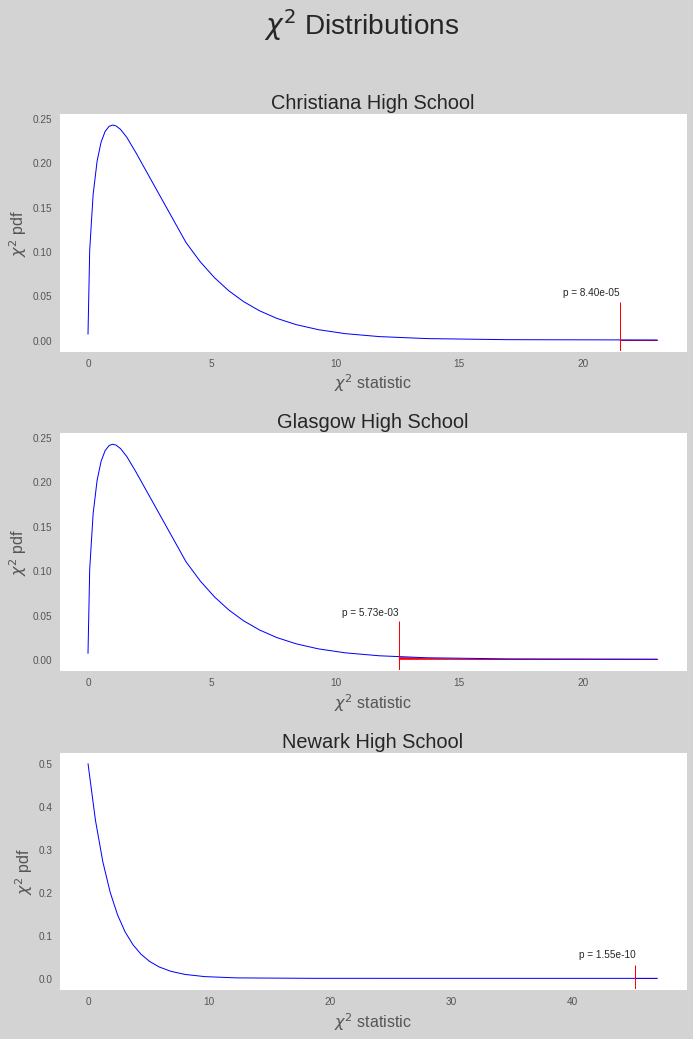

In [249]:
plt.style.use('ggplot')
fig, ax = plt.subplots(3,1, figsize=(10,15), sharex=False)
fig.set_facecolor('lightgray')
fig.set_edgecolor('lightgray')

end_chi = [23,23, 47]
for i, result in enumerate(results):
  # Styling
  ax[i].set_facecolor('white')
  
  # Gather results
  chi2_stat, p_val, dof, expected = result

  # Plot the chi2 distribution
  rv = chi2(dof)
  x = np.linspace(start=chi2.ppf(0.000001, dof), stop=end_chi[i], num=1000)
  ax[i].plot(x, rv.pdf(x), 'b-', lw=1, label=f'{highschool_names[i]}')
  # Fill in area under the curve corresponding to p-value
  px = np.linspace(start=chi2_stat, stop=end_chi[i], num=100)
  ax[i].fill_between(x=px, y1=0, y2=rv.pdf(px), color='red')
  # Plot line corresponding to p-value
  y_loc = 0.05
  ax[i].axvline(x=chi2_stat,linewidth=1, ymin=0, ymax=y_loc/max(rv.pdf(x)) , color='r')
  ax[i].text(x=chi2_stat, y=y_loc, s='p = {:.2e}'.format(p_val), ha='right')
  
  # Subplot title and labels
  ax[i].set_title(f"{highschool_names[i]}", fontsize=20)
  ax[i].set_xlabel('$\chi^2$ statistic', fontsize=16)
  ax[i].set_ylabel('$\chi^2$ pdf', fontsize=16)

# Adjust spacing
plt.subplots_adjust(hspace=0.35)
# fig.legend()
fig.suptitle("$\chi^2$ Distributions", fontsize=28)

# Save figure
fig.savefig('chi2_distributions.svg', facecolor='lightgray', edgecolor='white',
            format='svg')
plt.show()

## Mosaic Plots

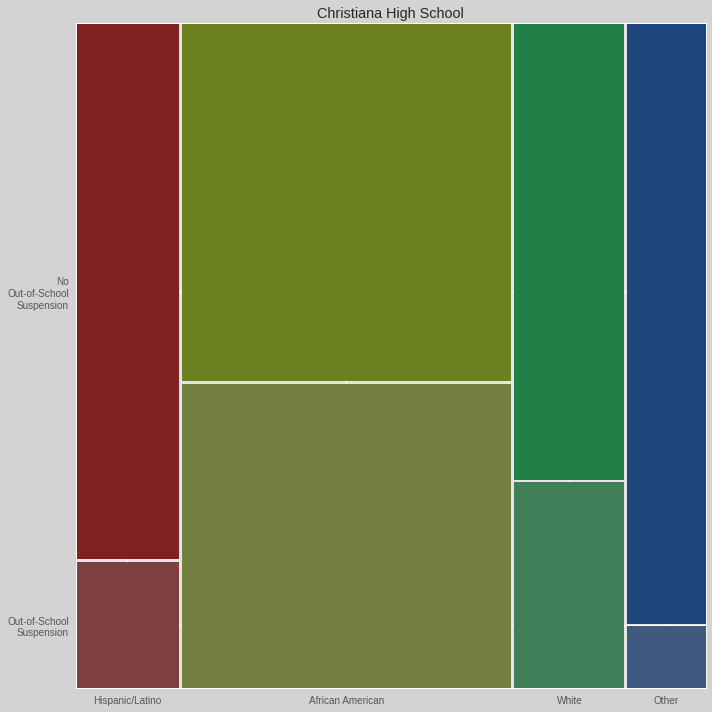

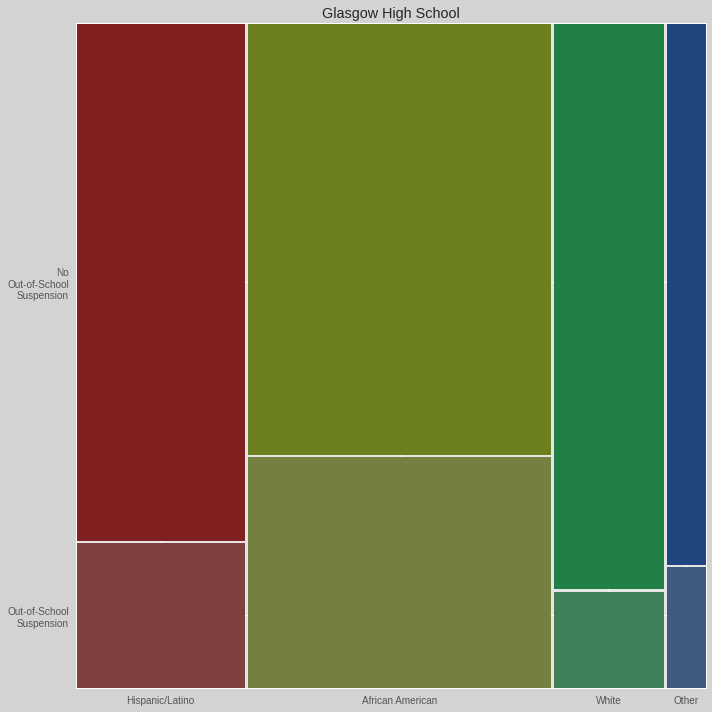

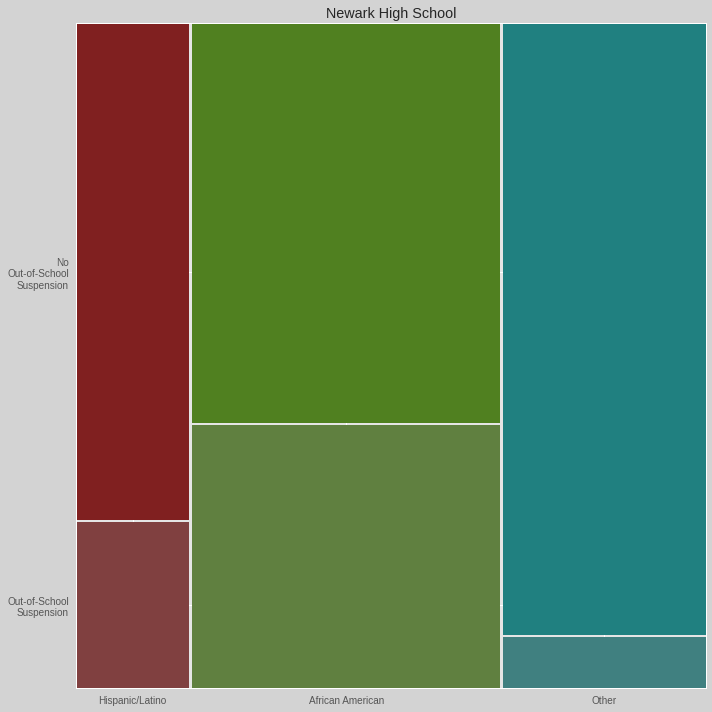

In [231]:
# Mosaic Plots
for code, school in zip(highschool_codes, highschool_names):
  table = contingency_from_school(filter_by_school(df,code))
  table.columns=['Out-of-School\nSuspension','No\nOut-of-School\nSuspension']

  fig = mosaic(table.stack(), title=f'{school}', 
               labelizer=lambda k: '',
               properties=props)[0]

  fig.set_facecolor('lightgray')
  plt.style.use('fast')
  fig.set_figheight(10)
  fig.set_figwidth(10)

  plt.rcParams['axes.labelsize'] = 50
  # plt.rcParams['axes.titlesize'] = 16

  # Save plots
  fig.tight_layout()
  fig.savefig(f'mosaic_{code}.svg', facecolor='lightgray', edgecolor='white',
            format='svg')

  plt.show()

---
# By Special Demo

In [27]:
def filter_by_school_sd(df, schoolcode, specialdemo):
  '''
  Takes student discipline dataframe with an integer schoolcode 
    and returns a dataframe for that school
    '''
  data = df.copy()
  
  # create boolean mask to filter rows
  mask = (data['schoolcode']==schoolcode) & (data['districtcode']!=0) & \
          (data['schoolyear']==2019) & (data['grade']=='9th Grade') & \
          (data['specialdemo']==specialdemo) & \
          (data['gender']=='All Students') & \
          (data['category'].isin(['All Students','Out-of-School Suspension']))
  # apply filter condition
  data = data[mask]
  
  # drop unwanted columns
  cols_to_drop = ['rowstatus','subgroup', 'specialdemo', 'pctenrollment',
                  'districtcode','schoolyear','grade','geography','gender'
                  ]
  data = data.drop(columns=cols_to_drop)

  return data

In [28]:
demo_list = df.specialdemo.unique()
for i, demo in enumerate(demo_list):
  print(i, demo)

0 All Students
1 Low-Income
2 Non-EL Students
3 Non-Foster Care
4 Non-Homeless
5 Non Low-Income
6 Non-SWD
7 Students with Disabilities
8 Active EL Students
9 Homeless
10 Foster Care
11 Military Connected Youth


In [50]:
filter_by_school_sd(df, 394, demo_list[1])

,district,schoolcode,organization,race,category,students,enrollment,incidents,avgduration
515189,Christina School District,394,Newark High School,All Students,Out-of-School Suspension,74.0,230.0,190.0,3.1


Unfortunately, it looks like we can't do much with the special demo category. There many groups that are missing data (redacted) and it's not clear if the special demo for the student is unique. We can't build proper contingency tables unless we have accurate counts for each entry in the table.